# Reading a file using CF module

What happens if we don't know the name of the variables inside the file?

There is nice module, build on top of netCDF4 and called [cf-python](http://cfpython.bitbucket.org/).<br/> It implements the [CF data model](http://cfconventions.org/) for the reading, writing and processing of data and metadata. 

In [23]:
%matplotlib inline
import cf
import netCDF4
import matplotlib.pyplot as plt
import matplotlib as mpl

The data file is the same.

In [5]:
dataurl = "http://thredds.socib.es/thredds/dodsC/mooring/tide_gauge/station_santantoni-scb_wlog001/L1/2016/dep0001_station-santantoni_scb-wlog001_L1_2016-01.nc"

## Read the file

We use the function *read*. Doing so, we easily obtain a nice summary of the file content.

In [6]:
f = cf.read(dataurl)
print f

long_name:voltage field summary
-------------------------------
Data           : long_name:voltage(time(18189)) V
Axes           : longitude(1) = [1.298776] degree_east
               : depth(1) = [0.0] m
               : latitude(1) = [38.977089] degree_north
               : time(18189) = [2016-01-01 00:00:00, ..., 2016-01-13 15:08:00] gregorian

long_name:station name field summary
------------------------------------
Data           : long_name:station name(ncdim%maxStrlen64(64)) 
Axes           : ncdim%maxStrlen64(64)

long_name:standard_deviation - The standard deviation of the variable SLEV field summary
----------------------------------------------------------------------------------------
Data           : long_name:standard_deviation - The standard deviation of the variable SLEV(time(18189)) m
Axes           : longitude(1) = [1.298776] degree_east
               : depth(1) = [0.0] m
               : latitude(1) = [38.977089] degree_north
               : time(18189) = [2016-01

We see that the file contains a sea-level variables, named *water_surface_height_above_reference_datum*, which is the [CF Standard name](http://cfconventions.org/standard-names.html).

## Read variable, coordinates and units

From the previous commands we cannot know the name of the variables within the file. But that's not necessary. Temperature can be retrived using its *standard name*:

In [7]:
sealevel = f.select('water_surface_height_above_reference_datum')
sealevel

<CF Field: water_surface_height_above_reference_datum(time(18189)) m>

The number of variables which have a standard name corresponding to **sea_water_temperature** is:

In [9]:
print(len(sealevel))

1


but in other cases (ex: different sensors measuring temperature with data in a common file), one can obtain more than one variable.

In [16]:
sealevel_values = sealevel.array
sealevel_units = sealevel.units

Let's print the first values and the units:

In [18]:
print sealevel_values[0:20]
print("Sea level units: %s" %(sealevel_units))

[-0.082 -0.079 -0.08  -0.076 -0.077 -0.074 -0.074 -0.074 -0.071 -0.072
 -0.073 -0.072 -0.07  -0.069 -0.066    nan -0.064 -0.063 -0.064 -0.064]
Sea level units: m


We inspect the corresponding coordinates: 

In [13]:
sealevel.coords()

{'dim0': <CF DimensionCoordinate: time(18189) gregorian>,
 'dim1': <CF DimensionCoordinate: latitude(1) degree_north>,
 'dim2': <CF DimensionCoordinate: longitude(1) degree_east>,
 'dim3': <CF DimensionCoordinate: depth(1) m>}

which means that longitute, latitude and depth are fixed.

To extract the time coordinate(s) from which the variable depends:

In [19]:
time = sealevel.coord('time')
time

<CF DimensionCoordinate: time(18189) gregorian>

and to get the values:

In [21]:
time_values = sealevel.coord('time').array
time_units = sealevel.coord('time').units
print time_values[0:20]
print("Time units: %s" %(time_units))

[  1.45160640e+09   1.45160646e+09   1.45160652e+09   1.45160658e+09
   1.45160664e+09   1.45160670e+09   1.45160676e+09   1.45160682e+09
   1.45160688e+09   1.45160694e+09   1.45160700e+09   1.45160706e+09
   1.45160712e+09   1.45160718e+09   1.45160724e+09   1.45160730e+09
   1.45160736e+09   1.45160742e+09   1.45160748e+09   1.45160754e+09]
Time units: seconds since 1970-01-01 00:00:00


# Plot 

We use the same commands as the previous example:

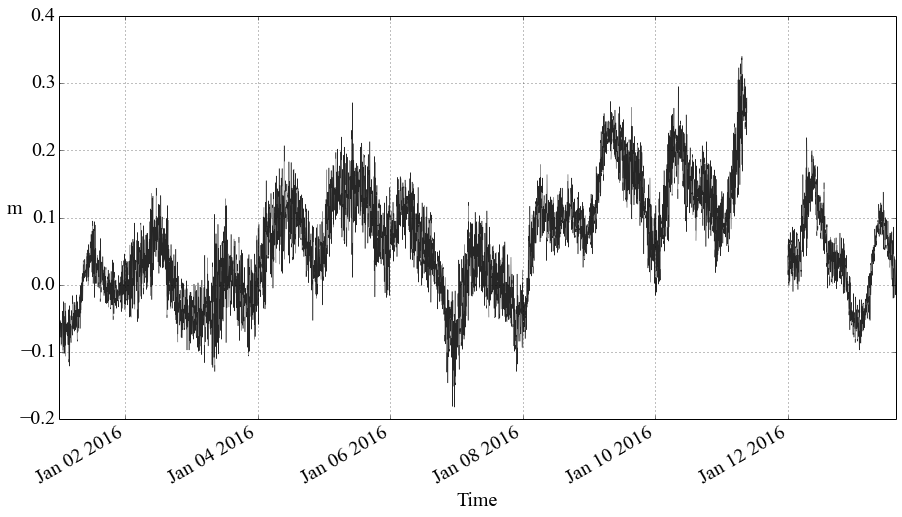

In [27]:
time2 = netCDF4.num2date(time_values, time_units)

mpl.rcParams.update({'font.size': 20, 'font.family': 'Times New Roman'})

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
plt.plot(time2, sealevel_values, linewidth=0.5, color='0.15')
plt.ylabel(sealevel_units, rotation=0)
plt.xlabel('Time')
fig.autofmt_xdate()
plt.grid()
plt.show()